In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_games = pd.read_csv("games_cleaned.csv")
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.2+ MB


Text(0.5, 1.05, 'Scatterplot and histogram of pairs of variables color coded by winner')

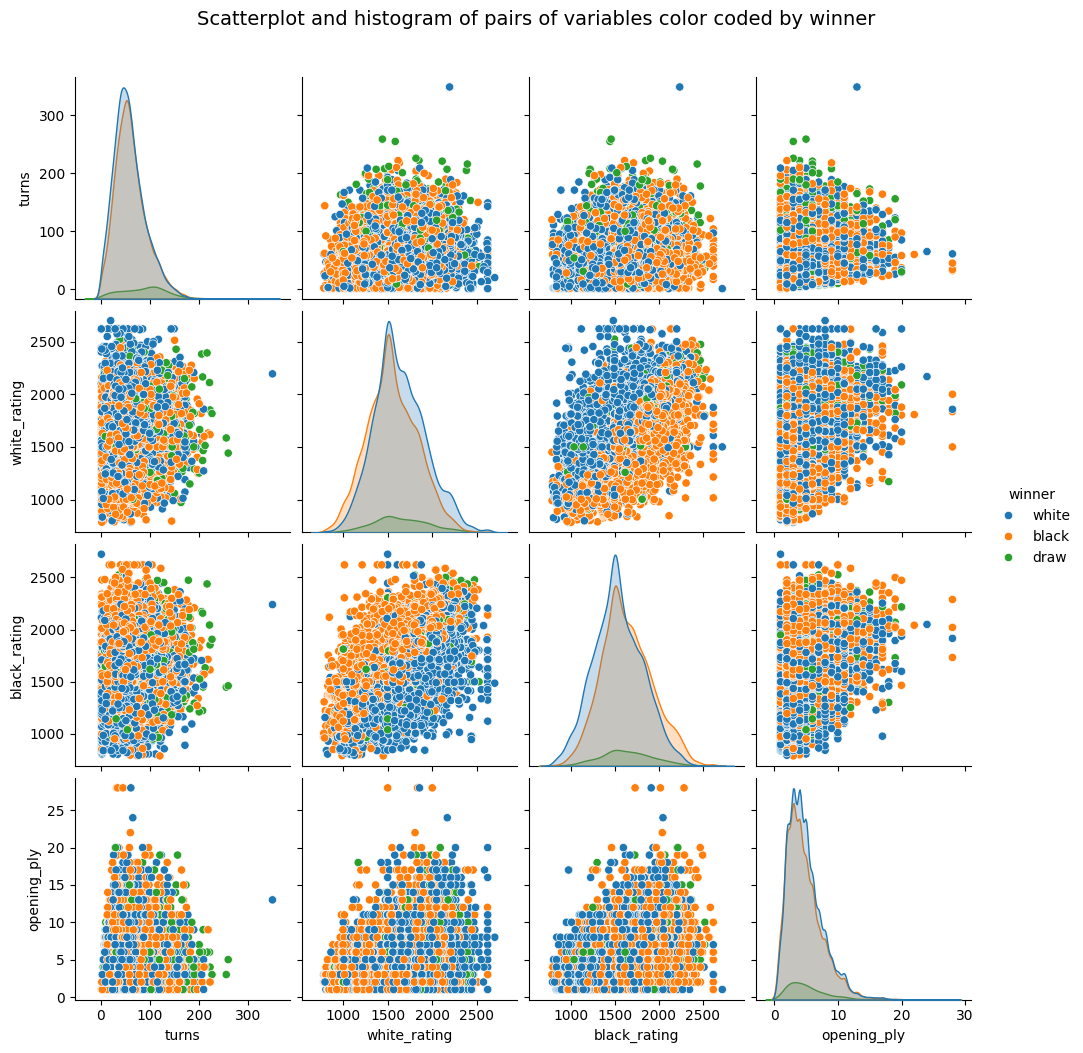

In [9]:
dataset = df_games[['id', 'turns', 'victory_status', 'winner', 'white_rating', 'black_rating', 'opening_eco', 'opening_ply']]
plot = sns.pairplot(dataset, hue='winner')
plot.figure.suptitle("Scatterplot and histogram of pairs of variables color coded by winner",
                  fontsize = 14,
                  y = 1.05)

In [15]:
print(dataset['victory_status'].unique())
print(dataset['winner'].unique())
print(dataset['opening_eco'].unique())
len(dataset['opening_eco'].unique())

['outoftime' 'resign' 'mate' 'draw']
['white' 'black' 'draw']
['D10' 'B00' 'C20' 'B27' 'D00' 'C50' 'B01' 'A00' 'C02' 'C00' 'C57' 'C41'
 'C55' 'A40' 'B20' 'A25' 'B21' 'D01' 'C45' 'D06' 'B52' 'D20' 'B06' 'A45'
 'B77' 'A21' 'B70' 'B23' 'B76' 'C21' 'A80' 'A20' 'A04' 'C26' 'C44' 'E10'
 'A41' 'C01' 'D02' 'A10' 'C18' 'A47' 'C10' 'D80' 'D30' 'D41' 'B03' 'B29'
 'B02' 'B13' 'B57' 'E20' 'E11' 'C40' 'C11' 'C28' 'A46' 'B30' 'A56' 'C65'
 'B90' 'B50' 'B51' 'E00' 'C70' 'B11' 'B22' 'B40' 'B31' 'B18' 'C61' 'C78'
 'B10' 'C42' 'D07' 'B32' 'C68' 'A22' 'C46' 'A02' 'C58' 'A03' 'B54' 'B12'
 'D03' 'D31' 'C69' 'A31' 'D46' 'C34' 'C48' 'C47' 'B24' 'C67' 'C60' 'E61'
 'C53' 'C23' 'B96' 'C54' 'A05' 'D92' 'A49' 'C22' 'C37' 'A09' 'A01' 'C88'
 'B34' 'C03' 'C33' 'A48' 'A11' 'A81' 'B05' 'B53' 'B08' 'C30' 'A15' 'B43'
 'C07' 'A34' 'D08' 'A30' 'A08' 'A13' 'D11' 'D50' 'A73' 'D35' 'D21' 'C64'
 'C15' 'B09' 'A52' 'E90' 'A06' 'B15' 'D17' 'A43' 'A65' 'B33' 'A67' 'C62'
 'D94' 'D37' 'B17' 'E21' 'A99' 'A16' 'B41' 'D43' 'C66' 'E17' '

365

In [ ]:
dataset['winner'] = dataset['winner'].replace('black', -1).replace('white', 1).replace('draw', 0)